# Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.

¿Consultas? En la página tenés soporte por IA guiada, comunidad y el acceso a certificación.

<br>

---  

# 0) Dataset 🔧🚜

Nos basamos en el dataset de Kaggle: [Apple Watch and Fitbit data](https://www.kaggle.com/datasets/aleespinosa/apple-watch-and-fitbit-data).

# 1) Cargamos los datos 📕

In [829]:
import pandas as pd
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [830]:
data = pd.read_csv("aw_fb_data.csv", sep=",", index_col="Unnamed: 0")


In [831]:
data.head(3)

X1  age  gender  height  weight      steps  hear_rate  calories  distance  \
1   1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0               1.0   19.531302   
2       6.221612       6.116349           59.0               1.0   19.453390   
3       6.221612       6.116349           59.0               1.0   19.540825   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520            1.0              0.089692  apple watch   
2            0.137967            1.0              0.102088  apple watch   
3            0.138587            1.0              0.115287  apple watch   

  activity  
1    Lying  
2    Lying  
3    Lying

In [832]:
data.shape

(6264, 19)

# 2) Preparación de la data 👀

In [833]:
status(data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                     X1      0    0.0        0  0.000000    3656    int64
1                    age      0    0.0        0  0.000000      24    int64
2                 gender      0    0.0     3279  0.523467       2    int64
3                 height      0    0.0        0  0.000000      28  float64
4                 weight      0    0.0        0  0.000000      43  float64
5                  steps      0    0.0        0  0.000000    3919  float64
6              hear_rate      0    0.0        0  0.000000    4514  float64
7               calories      0    0.0        0  0.000000    2136  float64
8               distance      0    0.0        0  0.000000    4863  float64
9          entropy_heart      0    0.0       18  0.002874      56  float64
10         entropy_setps      0    0.0       90  0.014368      60  float64
11         resting_heart      0    0.0        0  0.000000      83  float64
12      corr_heart_steps      0    0.0        0  0.000000    2925  float64
13            norm_heart      0    0.0      170  0.027139    5033  float64
14    intensity_karvonen      0    0.0      170  0.027139    5841  float64
15         sd_norm_heart      0    0.0        1  0.000160    3435  float64
16  steps_times_distance      0    0.0        0  0.000000    4939  float64
17                device      0    0.0        0  0.000000       2   object
18              activity      0    0.0        0  0.000000       6   object

Eliminar las columna `X1`.

In [834]:
data = data.drop(["X1"], axis=1)

Reviso si hay nulos

In [835]:
data.isnull().sum()

age                     0
gender                  0
height                  0
weight                  0
steps                   0
hear_rate               0
calories                0
distance                0
entropy_heart           0
entropy_setps           0
resting_heart           0
corr_heart_steps        0
norm_heart              0
intensity_karvonen      0
sd_norm_heart           0
steps_times_distance    0
device                  0
activity                0
dtype: int64

Reviso si hay duplicados

In [836]:
data[data.duplicated()]

age  gender  height  weight  steps  hear_rate  calories  distance  \
5082   37       1   183.0   115.0    1.0      155.0      75.0       1.0   
5083   37       1   183.0   115.0    1.0      155.0      75.0       1.0   
5086   18       1   180.3    90.0    1.0        3.0       3.5       1.0   
5088   18       1   180.3    90.0    1.0        3.0       3.5       1.0   
5306   48       1   170.0    88.0    1.0      139.0      20.5       1.0   
5307   48       1   170.0    88.0    1.0      139.0      20.5       1.0   
5311   20       1   184.0    77.3    1.0        4.0       4.0       1.0   
6262   46       0   157.5    71.4    1.0       35.0      20.5       1.0   
6263   46       0   157.5    71.4    1.0       35.0      20.5       1.0   
6264   46       0   157.5    71.4    1.0       35.0      20.5       1.0   

      entropy_heart  entropy_setps  resting_heart  corr_heart_steps  \
5082       0.106792       0.106792          155.0               1.0   
5083       0.106792       0.106792          155.0               1.0   
5086       0.104419       0.000000            3.0               1.0   
5088       0.104419       0.000000            3.0               1.0   
5306       0.097941       0.000000          139.0               1.0   
5307       0.097941       0.000000          139.0               1.0   
5311       0.519311       0.104419            4.0               1.0   
6262       0.000000       0.000000           35.0               1.0   
6263       0.000000       0.000000           35.0               1.0   
6264       0.000000       0.000000           35.0               1.0   

      norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
5082         0.0                 0.0      24.033310                   1.0   
5083         0.0                 0.0      24.033310                   1.0   
5086         0.0                 0.0      24.033310                   1.0   
5088         0.0                 0.0      24.033310                   1.0   
5306         0.0                 0.0      21.345374                   1.0   
5307         0.0                 0.0      21.345374                   1.0   
5311         0.0                 0.0      21.345374                   1.0   
6262         0.0                 0.0       1.000000                   1.0   
6263         0.0                 0.0       1.000000                   1.0   
6264         0.0                 0.0       1.000000                   1.0   

      device        activity  
5082  fitbit  Running 7 METs  
5083  fitbit  Running 7 METs  
5086  fitbit           Lying  
5088  fitbit           Lying  
5306  fitbit  Running 7 METs  
5307  fitbit  Running 7 METs  
5311  fitbit           Lying  
6262  fitbit  Running 7 METs  
6263  fitbit  Running 7 METs  
6264  fitbit  Running 7 METs

In [837]:
data = data.drop_duplicates()

Para probar si baja el ruido, elimino las columnas que parecen contener información computada para quedarme solamente con la información observable

In [838]:
obs_data = data.drop(data.columns[8:16], axis=1)

In [839]:
data.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0               1.0   19.531302   
2       6.221612       6.116349           59.0               1.0   19.453390   
3       6.221612       6.116349           59.0               1.0   19.540825   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520            1.0              0.089692  apple watch   
2            0.137967            1.0              0.102088  apple watch   
3            0.138587            1.0              0.115287  apple watch   

  activity  
1    Lying  
2    Lying  
3    Lying

In [840]:
obs_data.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

        device activity  
1  apple watch    Lying  
2  apple watch    Lying  
3  apple watch    Lying

# 3) AED & Storytelling 🧐

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

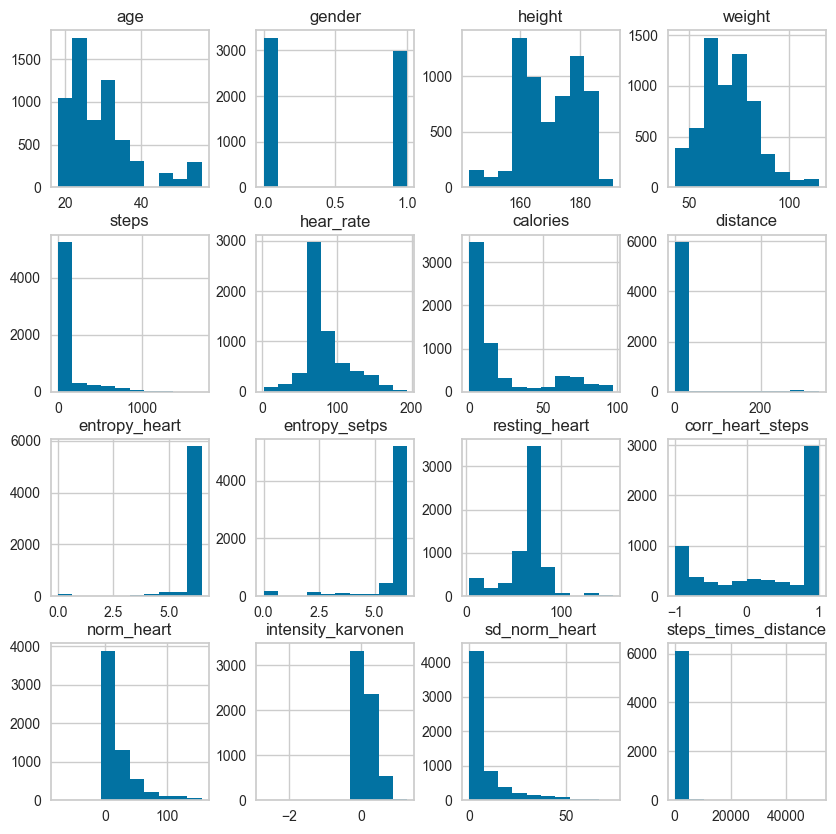

In [841]:
data.hist(figsize = (10,10))

In [842]:
len(data)

6254

### Análisis de distribución

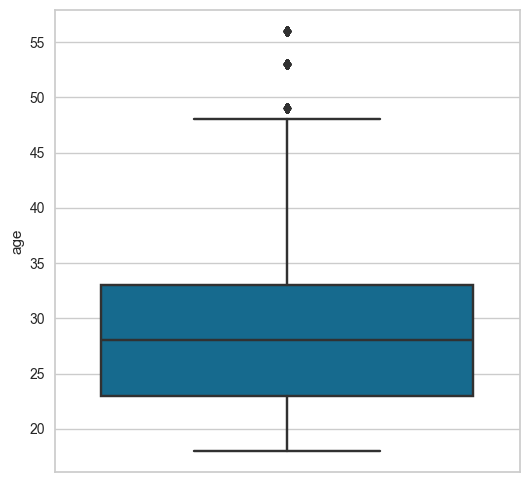

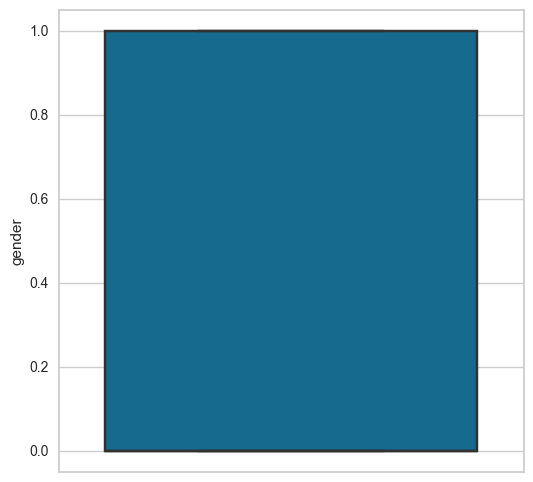

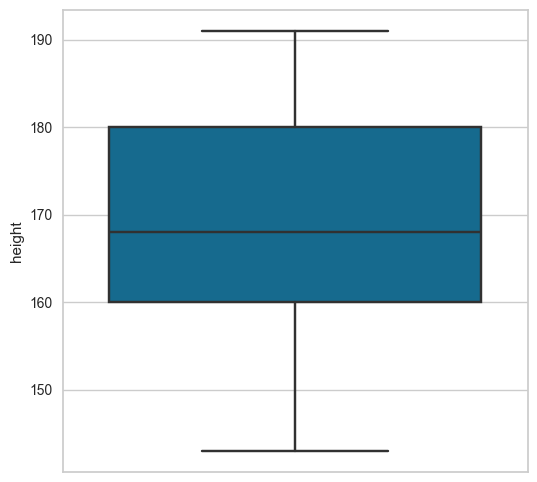

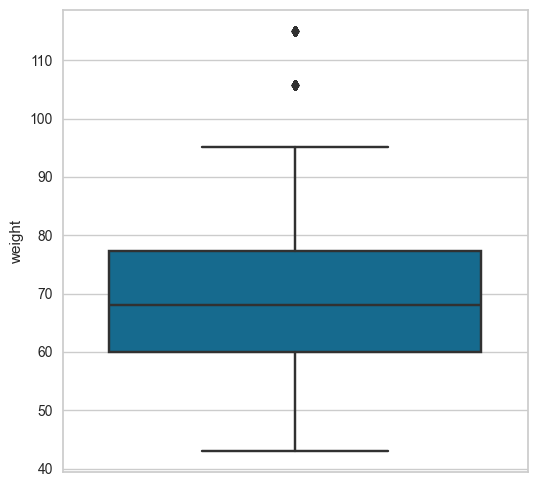

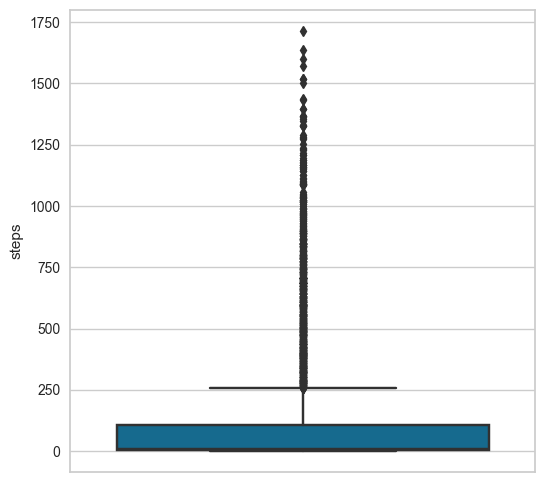

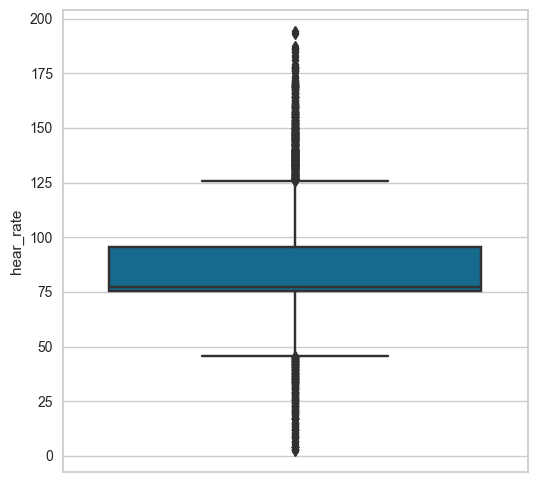

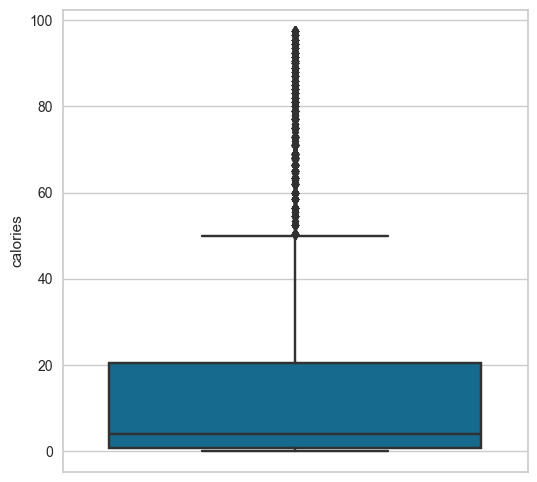

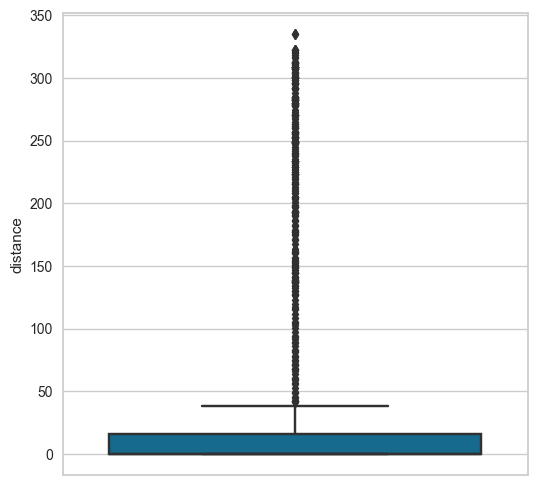

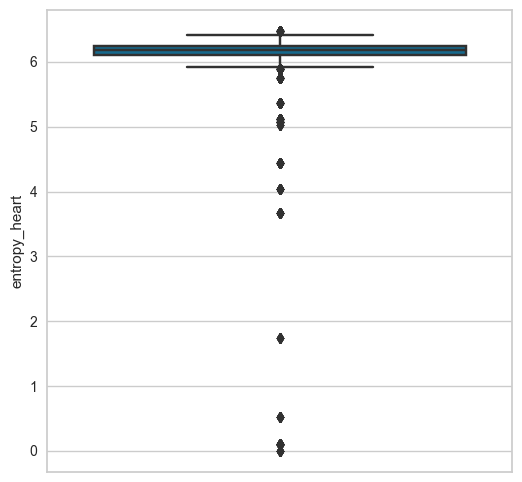

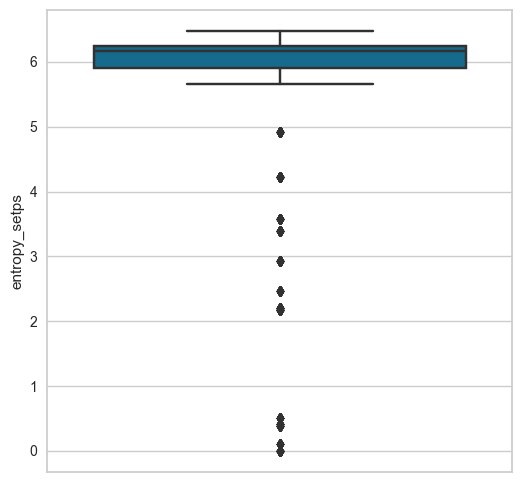

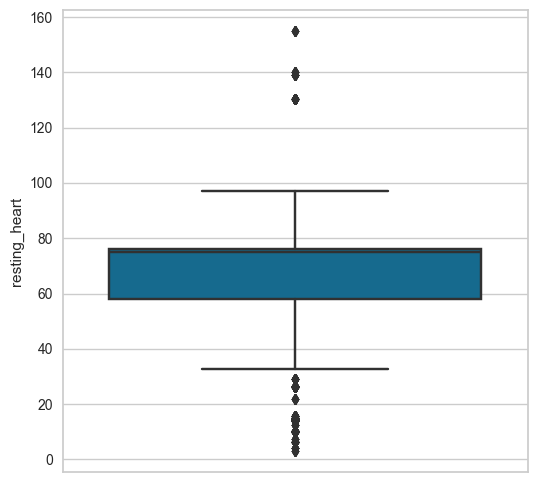

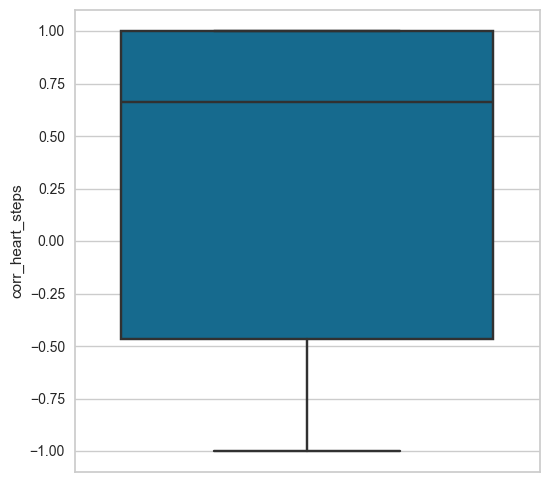

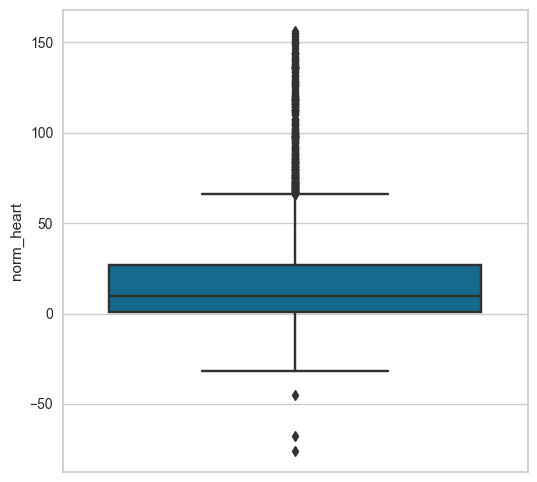

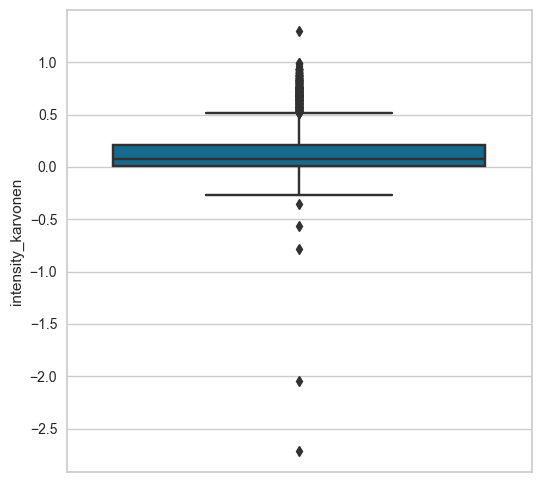

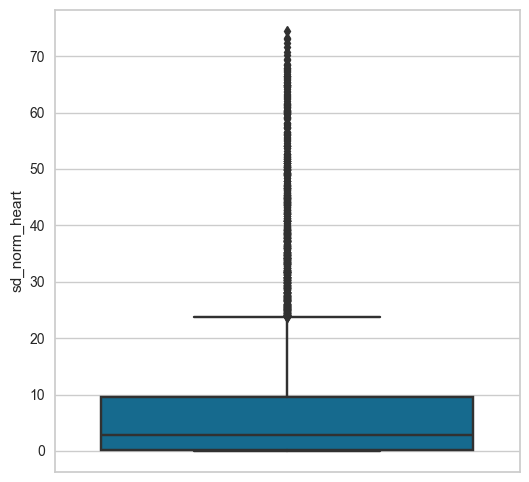

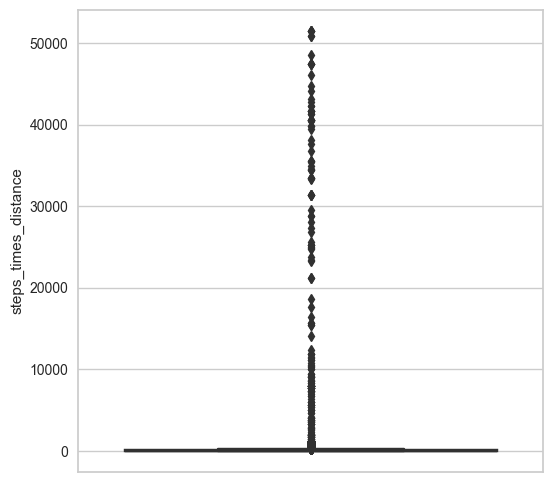

In [843]:
int_cols = data.select_dtypes(exclude='object').columns
for _ in int_cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=data, y= _)
    plt.show()

Los gráficos de boxplot muestran columnas con muchos valores atípicos o outliers, lo cual sugiere una estandarización más que una normalización.

In [844]:
ProfileReport(data, minimal=True)

Python(99505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 18/18 [00:00<00:00, 192.46it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aplicar get dummies

In [845]:
filter_data = pd.get_dummies(data)

In [846]:
filter_data.head(3)

age  gender  height  weight      steps  hear_rate  calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302  0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390  3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825  9.484000  0.009466   

   entropy_heart  entropy_setps  ...  sd_norm_heart  steps_times_distance  \
1       6.221612       6.116349  ...            1.0              0.089692   
2       6.221612       6.116349  ...            1.0              0.102088   
3       6.221612       6.116349  ...            1.0              0.115287   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                True          False            True                    False   
2                True          False            True                    False   
3                True          False            True                    False   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   

   activity_Sitting  
1             False  
2             False  
3             False  

[3 rows x 24 columns]

In [847]:
status(filter_data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                       age      0    0.0        0  0.000000      24    int64
1                    gender      0    0.0     3276  0.523825       2    int64
2                    height      0    0.0        0  0.000000      28  float64
3                    weight      0    0.0        0  0.000000      43  float64
4                     steps      0    0.0        0  0.000000    3919  float64
5                 hear_rate      0    0.0        0  0.000000    4514  float64
6                  calories      0    0.0        0  0.000000    2136  float64
7                  distance      0    0.0        0  0.000000    4863  float64
8             entropy_heart      0    0.0       15  0.002398      56  float64
9             entropy_setps      0    0.0       83  0.013272      60  float64
10            resting_heart      0    0.0        0  0.000000      83  float64
11         corr_heart_steps      0    0.0        0  0.000000    2925  float64
12               norm_heart      0    0.0      160  0.025584    5033  float64
13       intensity_karvonen      0    0.0      160  0.025584    5841  float64
14            sd_norm_heart      0    0.0        1  0.000160    3435  float64
15     steps_times_distance      0    0.0        0  0.000000    4939  float64
16       device_apple watch      0    0.0     2598  0.415414       2     bool
17            device_fitbit      0    0.0     3656  0.584586       2     bool
18           activity_Lying      0    0.0     4878  0.779981       2     bool
19  activity_Running 3 METs      0    0.0     5304  0.848097       2     bool
20  activity_Running 5 METs      0    0.0     5252  0.839783       2     bool
21  activity_Running 7 METs      0    0.0     5147  0.822993       2     bool
22  activity_Self Pace walk      0    0.0     5365  0.857851       2     bool
23         activity_Sitting      0    0.0     5324  0.851295       2     bool

In [848]:
filter_obs_data = pd.get_dummies(obs_data)
filter_obs_data.head(5)

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                True          False            True                    False   
2                True          False            True                    False   
3                True          False            True                    False   
4                True          False            True                    False   
5                True          False            True                    False   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   
5                    False                    False                    False   

   activity_Sitting  
1             False  
2             False  
3             False  
4             False  
5             False

# 4) Clustering con K-Means 🎯

## 4.1) Tenemos que <s>normalizar</s> estandarizar los datos?? (z-score)

Si las distribuciones son normales se estandariza, si no lo son, se normalizan con minmaxscaler.
Pero cómo saber si son normales o no?

In [849]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

# A ver que hizo!?
pd.DataFrame(x_data_norm).describe()

0             1             2             3             4   \
count  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03   
mean  -1.363369e-16 -6.362391e-17 -2.435887e-15  1.999609e-16  5.453478e-17   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -1.252850e+00 -9.534335e-01 -2.587030e+00 -1.979904e+00 -4.877889e-01   
25%   -6.908797e-01 -9.534335e-01 -9.401591e-01 -7.138600e-01 -4.690972e-01   
50%   -1.289098e-01 -9.534335e-01 -1.651611e-01 -1.180746e-01 -4.469647e-01   
75%    4.330600e-01  1.048841e+00  9.973359e-01  5.745259e-01 -1.675904e-02   
max    3.018121e+00  1.048841e+00  2.062958e+00  3.382164e+00  7.196726e+00   

                 5             6             7             8             9   \
count  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03   
mean   1.090696e-16  7.271304e-17  3.635652e-17  4.726348e-16  2.908522e-16   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -2.940559e+00 -7.105514e-01 -3.013302e-01 -8.289606e+00 -4.650169e+00   
25%   -3.702463e-01 -6.856933e-01 -3.009247e-01  9.435903e-02  1.296821e-01   
50%   -3.117369e-01 -5.661408e-01 -2.974467e-01  2.059436e-01  3.396108e-01   
75%    3.326438e-01  3.805225e-02  4.011812e-02  2.856901e-01  4.034673e-01   
max    3.788979e+00  2.857620e+00  6.985766e+00  5.983543e-01  5.877282e-01   

       ...            14            15            16            17  \
count  ...  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03   
mean   ...  1.726935e-16 -1.817826e-17  7.271304e-17 -7.271304e-17   
std    ...  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min    ... -6.460971e-01 -1.453211e-01 -1.186270e+00 -8.429785e-01   
25%    ... -6.249756e-01 -1.451605e-01 -1.186270e+00 -8.429785e-01   
50%    ... -4.152320e-01 -1.420029e-01  8.429785e-01 -8.429785e-01   
75%    ...  1.247117e-01 -1.222687e-01  8.429785e-01  1.186270e+00   
max    ...  5.294708e+00  1.252345e+01  8.429785e-01  1.186270e+00   

                 18            19            20            21            22  \
count  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03  6.254000e+03   
mean  -1.874633e-17  5.907934e-17 -5.680706e-17 -1.158864e-16  1.022527e-17   
std    1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00  1.000080e+00   
min   -5.311147e-01 -4.232140e-01 -4.367888e-01 -4.637637e-01 -4.070671e-01   
25%   -5.311147e-01 -4.232140e-01 -4.367888e-01 -4.637637e-01 -4.070671e-01   
50%   -5.311147e-01 -4.232140e-01 -4.367888e-01 -4.637637e-01 -4.070671e-01   
75%   -5.311147e-01 -4.232140e-01 -4.367888e-01 -4.637637e-01 -4.070671e-01   
max    1.882832e+00  2.362871e+00  2.289436e+00  2.156271e+00  2.456597e+00   

                 23  
count  6.254000e+03  
mean  -3.522038e-17  
std    1.000080e+00  
min   -4.179482e-01  
25%   -4.179482e-01  
50%   -4.179482e-01  
75%   -4.179482e-01  
max    2.392641e+00  

[8 rows x 24 columns]

In [851]:
std_scaler_obs = StandardScaler()
std_scaler_obs.fit(filter_obs_data)
x_obs_data_norm=std_scaler_obs.transform(filter_obs_data)

### Estadarización con Robust Scaler

In [852]:
from sklearn.preprocessing import RobustScaler

In [853]:

robust_scaler = RobustScaler()
robust_scaler_obs = RobustScaler()

robust_scaler.fit(filter_data)
robust_scaler_obs.fit(filter_obs_data)

x_data_rob = robust_scaler.transform(filter_data)
x_obs_data_rob = robust_scaler_obs.transform(filter_obs_data)

In [855]:
# Cambio de variables de std_scaller a robust_scaller para exploración rápida

x_data_norm = x_data_rob
x_obs_data_norm = x_obs_data_rob

## 4.2) Creación del modelo

In [856]:
from sklearn.cluster import KMeans

cl_model = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model.fit(x_data_norm)

cl_model_centers = cl_model.cluster_centers_

In [857]:
cl_model_obs = KMeans(
    n_clusters=3,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_obs.fit(x_obs_data_norm)

cl_model_obs_centers = cl_model_obs.cluster_centers_

Creo modelos con 4 y 5 clusters para probarlos

In [858]:
cl_model_4 = KMeans(
    n_clusters=4,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_4.fit(x_data_norm)

cl_model_4_centers = cl_model_4.cluster_centers_

In [859]:
cl_model_4_obs = KMeans(
    n_clusters=4,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_4_obs.fit(x_obs_data_norm)

cl_model_4_obs_centers = cl_model_4_obs.cluster_centers_

In [860]:
cl_model_5 = KMeans(
    n_clusters=5,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_5.fit(x_data_norm)

cl_model_5_centers = cl_model_5.cluster_centers_

In [861]:
cl_model_5_obs = KMeans(
    n_clusters=5,     # el parámetro importante!
    init='k-means++', # k-means++ acelera la convergencia, respecto de random
    max_iter=100, 
    random_state=0,
    n_init='auto'     # Para evitar warnings más adelante
)

cl_model_5_obs.fit(x_obs_data_norm)

cl_model_5_obs_centers = cl_model_5_obs.cluster_centers_

In [862]:
# k = 3
pred_cl = cl_model.predict(x_data_norm)
pred_cl_obs = cl_model_obs.predict(x_obs_data_norm)

# k = 4
pred_cl_4 = cl_model_4.predict(x_data_norm)
pred_cl_4_obs = cl_model_4_obs.predict(x_obs_data_norm)

# k = 5
pred_cl_5 = cl_model_5.predict(x_data_norm)
pred_cl_5_obs = cl_model_5_obs.predict(x_obs_data_norm)


In [863]:
filter_data.columns.tolist()

['age',
 'gender',
 'height',
 'weight',
 'steps',
 'hear_rate',
 'calories',
 'distance',
 'entropy_heart',
 'entropy_setps',
 'resting_heart',
 'corr_heart_steps',
 'norm_heart',
 'intensity_karvonen',
 'sd_norm_heart',
 'steps_times_distance',
 'device_apple watch',
 'device_fitbit',
 'activity_Lying',
 'activity_Running 3 METs',
 'activity_Running 5 METs',
 'activity_Running 7 METs',
 'activity_Self Pace walk',
 'activity_Sitting']

In [864]:
x_data_norm_pred = pd.DataFrame(x_data_norm)
x_data_norm_pred.columns = filter_data.columns.tolist()
x_data_norm_pred

age  gender  height    weight     steps  hear_rate  calories  distance  \
0    -0.8     1.0   0.000 -0.150289  0.006655   0.062940 -0.184948 -0.010884   
1    -0.8     1.0   0.000 -0.150289  0.013636   0.059057 -0.036042 -0.010848   
2    -0.8     1.0   0.000 -0.150289  0.020617   0.063414  0.277462 -0.010811   
3    -0.8     1.0   0.000 -0.150289  0.027598   0.067772  0.311389 -0.010775   
4    -0.8     1.0   0.000 -0.150289  0.034578   0.072129  0.345315 -0.010739   
...   ...     ...     ...       ...       ...        ...       ...       ...   
6249  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6250  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6251  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6252  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497  0.834814  0.052367   
6253  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497  0.834814  0.052367   

      entropy_heart  entropy_setps  ...  sd_norm_heart  steps_times_distance  \
0          0.228023      -0.155491  ...      -0.201521             -0.143997   
1          0.228023      -0.155491  ...      -0.201521             -0.143864   
2          0.228023      -0.155491  ...      -0.201521             -0.143722   
3          0.228023      -0.155491  ...      -0.201521             -0.143571   
4          0.228023      -0.155491  ...      -0.282239             -0.143412   
...             ...            ...  ...            ...                   ...   
6249     -44.402359     -18.225158  ...       5.874698             -0.134218   
6250     -44.402359     -18.225158  ...       4.658258             -0.134218   
6251     -44.402359     -18.225158  ...       2.360440             -0.134218   
6252     -44.402359     -18.225158  ...      -0.307949             -0.134218   
6253     -44.402359     -18.225158  ...      -0.201521             -0.134218   

      device_apple watch  device_fitbit  activity_Lying  \
0                    0.0            0.0             1.0   
1                    0.0            0.0             1.0   
2                    0.0            0.0             1.0   
3                    0.0            0.0             1.0   
4                    0.0            0.0             1.0   
...                  ...            ...             ...   
6249                -1.0            1.0             1.0   
6250                -1.0            1.0             1.0   
6251                -1.0            1.0             1.0   
6252                -1.0            1.0             0.0   
6253                -1.0            1.0             0.0   

      activity_Running 3 METs  activity_Running 5 METs  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
6249                      0.0                      0.0   
6250                      0.0                      0.0   
6251                      0.0                      0.0   
6252                      0.0                      0.0   
6253                      0.0                      0.0   

      activity_Running 7 METs  activity_Self Pace walk  activity_Sitting  
0                         0.0                      0.0               0.0  
1                         0.0                      0.0               0.0  
2                         0.0                      0.0               0.0  
3                         0.0                      0.0               0.0  
4                         0.0                      0.0               0.0  
...                       ...                      ...               ...  
6249                      0.0                      0.0               0.0  
6250                      0.0                      0.0               0.0  
625

In [865]:
x_obs_data_norm_pred = pd.DataFrame(x_obs_data_norm)
x_obs_data_norm_pred.columns = filter_obs_data.columns.tolist()
x_obs_data_norm_pred

age  gender  height    weight     steps  hear_rate  calories  distance  \
0    -0.8     1.0   0.000 -0.150289  0.006655   0.062940 -0.184948 -0.010884   
1    -0.8     1.0   0.000 -0.150289  0.013636   0.059057 -0.036042 -0.010848   
2    -0.8     1.0   0.000 -0.150289  0.020617   0.063414  0.277462 -0.010811   
3    -0.8     1.0   0.000 -0.150289  0.027598   0.067772  0.311389 -0.010775   
4    -0.8     1.0   0.000 -0.150289  0.034578   0.072129  0.345315 -0.010739   
...   ...     ...     ...       ...       ...        ...       ...       ...   
6249  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6250  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6251  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497 -0.151784  0.052367   
6252  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497  0.834814  0.052367   
6253  1.8     0.0  -0.525  0.196532 -0.090251  -2.106497  0.834814  0.052367   

      device_apple watch  device_fitbit  activity_Lying  \
0                    0.0            0.0             1.0   
1                    0.0            0.0             1.0   
2                    0.0            0.0             1.0   
3                    0.0            0.0             1.0   
4                    0.0            0.0             1.0   
...                  ...            ...             ...   
6249                -1.0            1.0             1.0   
6250                -1.0            1.0             1.0   
6251                -1.0            1.0             1.0   
6252                -1.0            1.0             0.0   
6253                -1.0            1.0             0.0   

      activity_Running 3 METs  activity_Running 5 METs  \
0                         0.0                      0.0   
1                         0.0                      0.0   
2                         0.0                      0.0   
3                         0.0                      0.0   
4                         0.0                      0.0   
...                       ...                      ...   
6249                      0.0                      0.0   
6250                      0.0                      0.0   
6251                      0.0                      0.0   
6252                      0.0                      0.0   
6253                      0.0                      0.0   

      activity_Running 7 METs  activity_Self Pace walk  activity_Sitting  
0                         0.0                      0.0               0.0  
1                         0.0                      0.0               0.0  
2                         0.0                      0.0               0.0  
3                         0.0                      0.0               0.0  
4                         0.0                      0.0               0.0  
...                       ...                      ...               ...  
6249                      0.0                      0.0               0.0  
6250                      0.0                      0.0               0.0  
6251                      0.0                      0.0               0.0  
6252                      1.0                      0.0               0.0  
6253                      1.0                      0.0               0.0  

[6254 rows x 16 columns]

In [866]:
x_data_norm_pred['3cluster'] = pred_cl
x_obs_data_norm_pred['3cluster'] = pred_cl_obs

x_data_norm_pred['4cluster'] = pred_cl_4
x_obs_data_norm_pred['4cluster'] = pred_cl_4_obs

x_data_norm_pred['5cluster'] = pred_cl_5
x_obs_data_norm_pred['5cluster'] = pred_cl_5_obs

## 4.3) Pequeño paréntesis... ¿Cantidad de clusters?

In [867]:
cl_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [868]:
from copy import deepcopy

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



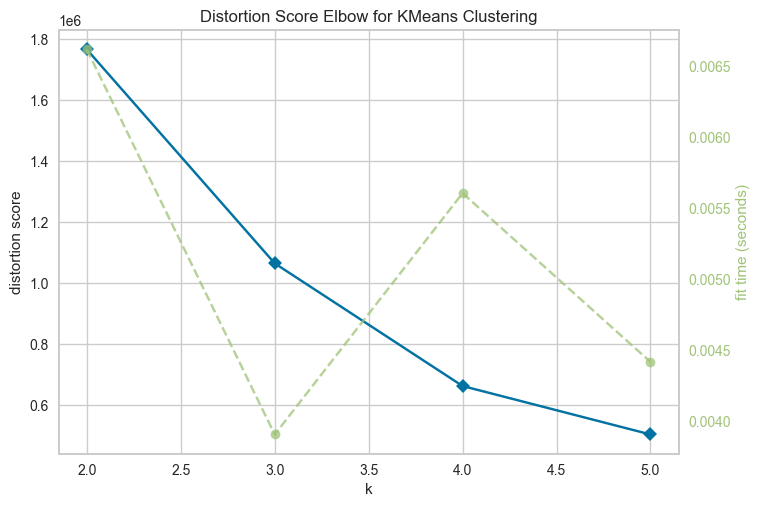

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=5, random_state=0),
                 k=(2, 6))

In [869]:
from yellowbrick.cluster.elbow import kelbow_visualizer

cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,6), locate_elbow=True)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



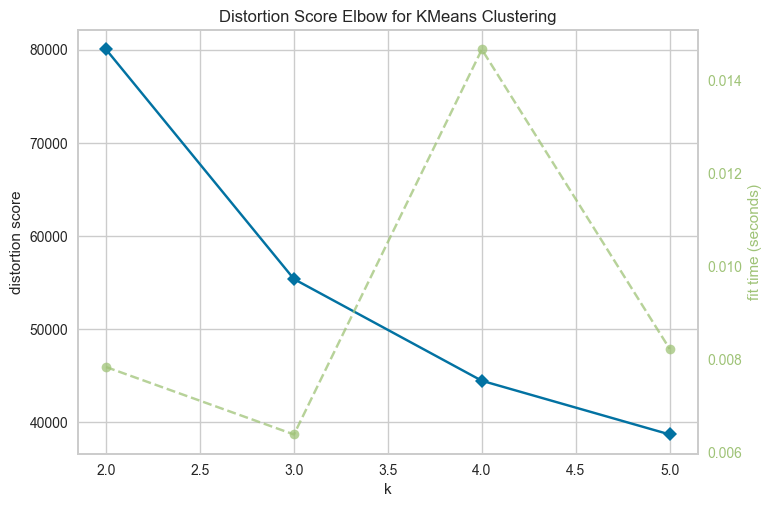

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(max_iter=100, n_clusters=5, random_state=0),
                 k=(2, 6))

In [870]:
kelbow_visualizer(cl_model2, x_obs_data_norm, k=(2,6), locate_elbow=True)

Copy-paste de la [doc](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html): _distortion, which computes the sum of squared distances from each point to its assigned center._

## 4.4) Analizando el modelo final: Gráfico de coordenadas

Hacemos copia de los datos y le agregamos el cluster:

In [871]:
x_data_norm.shape

(6254, 24)

In [872]:
cl_model

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [873]:
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl['3cluster']=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados
x_data_cl['4cluster']=cl_model_4.predict(x_data_norm)
x_data_cl['5cluster']=cl_model_5.predict(x_data_norm)

x_obs_data_cl=filter_obs_data.copy()
x_obs_data_cl['3cluster']=cl_model_obs.predict(x_obs_data_norm) 
x_obs_data_cl['4cluster']=cl_model_4_obs.predict(x_obs_data_norm) 
x_obs_data_cl['5cluster']=cl_model_5_obs.predict(x_obs_data_norm)

In [874]:
df_k_means_center = pd.DataFrame(
    {
        'x1':cl_model_centers[:,0],
        'x2':cl_model_centers[:,1]
    }
)
df_k_means_center_obs = pd.DataFrame(
    {
        'x1':cl_model_obs_centers[:,0],
        'x2':cl_model_obs_centers[:,1]
    }
)
df_k_means_center_4 = pd.DataFrame(
    {
        'x1':cl_model_4_centers[:,0],
        'x2':cl_model_4_centers[:,1]
    }
)
df_k_means_center_4_obs = pd.DataFrame(
    {
        'x1':cl_model_4_obs_centers[:,0],
        'x2':cl_model_4_obs_centers[:,1]
    }
)
df_k_means_center_5 = pd.DataFrame(
    {
        'x1':cl_model_5_centers[:,0],
        'x2':cl_model_5_centers[:,1]
    }
)
df_k_means_center_5_obs = pd.DataFrame(
    {
        'x1':cl_model_5_obs_centers[:,0],
        'x2':cl_model_5_obs_centers[:,1]
    }
)

In [875]:
x_obs_data_norm_pred.head()

age  gender  height    weight     steps  hear_rate  calories  distance  \
0 -0.8     1.0     0.0 -0.150289  0.006655   0.062940 -0.184948 -0.010884   
1 -0.8     1.0     0.0 -0.150289  0.013636   0.059057 -0.036042 -0.010848   
2 -0.8     1.0     0.0 -0.150289  0.020617   0.063414  0.277462 -0.010811   
3 -0.8     1.0     0.0 -0.150289  0.027598   0.067772  0.311389 -0.010775   
4 -0.8     1.0     0.0 -0.150289  0.034578   0.072129  0.345315 -0.010739   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
0                 0.0            0.0             1.0                      0.0   
1                 0.0            0.0             1.0                      0.0   
2                 0.0            0.0             1.0                      0.0   
3                 0.0            0.0             1.0                      0.0   
4                 0.0            0.0             1.0                      0.0   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   activity_Sitting  3cluster  4cluster  5cluster  
0               0.0         0         2         0  
1               0.0         0         2         0  
2               0.0         0         2         0  
3               0.0         0         2         0  
4               0.0         0         2         0

In [876]:
x_obs_data_norm_pred.columns

Index(['age', 'gender', 'height', 'weight', 'steps', 'hear_rate', 'calories',
       'distance', 'device_apple watch', 'device_fitbit', 'activity_Lying',
       'activity_Running 3 METs', 'activity_Running 5 METs',
       'activity_Running 7 METs', 'activity_Self Pace walk',
       'activity_Sitting', '3cluster', '4cluster', '5cluster'],
      dtype='object')

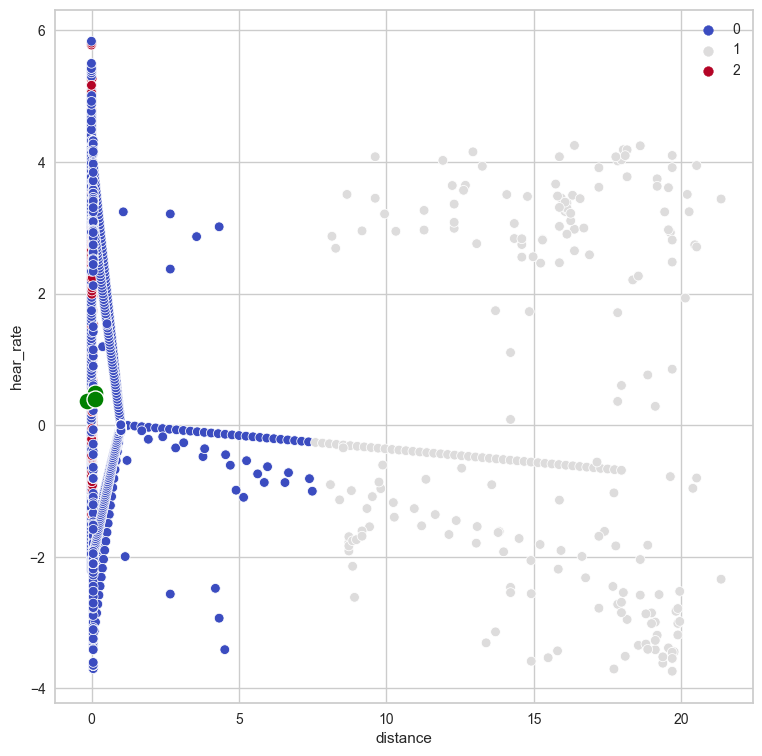

In [877]:
fig = plt.figure(figsize=(9,9))
sns.scatterplot(data=x_obs_data_norm_pred,  x='distance', y='hear_rate', hue= '3cluster', palette='coolwarm')
sns.scatterplot(data=df_k_means_center_obs,  x='x1', y='x2', marker='o', s=150 , color='green')
plt.show()


In [878]:
x_data_cl.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  ...  device_fitbit  activity_Lying  \
1       6.221612       6.116349  ...          False            True   
2       6.221612       6.116349  ...          False            True   
3       6.221612       6.116349  ...          False            True   
4       6.221612       6.116349  ...          False            True   
5       6.221612       6.116349  ...          False            True   

   activity_Running 3 METs  activity_Running 5 METs  activity_Running 7 METs  \
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   
5                    False                    False                    False   

   activity_Self Pace walk  activity_Sitting  3cluster  4cluster  5cluster  
1                    False             False         0         0         0  
2                    False             False         0         0         0  
3                    False             False         0         0         0  
4                    False             False         0         0         0  
5                    False             False         0         0         0  

[5 rows x 27 columns]

In [879]:
x_obs_data_cl.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                True          False            True                    False   
2                True          False            True                    False   
3                True          False            True                    False   
4                True          False            True                    False   
5                True          False            True                    False   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   
5                    False                    False                    False   

   activity_Sitting  3cluster  4cluster  5cluster  
1             False         0         2         0  
2             False         0         2         0  
3             False         0         2         0  
4             False         0         2         0  
5             False         0         2         0

In [880]:
from funpymodeling.model_validation import coord_plot

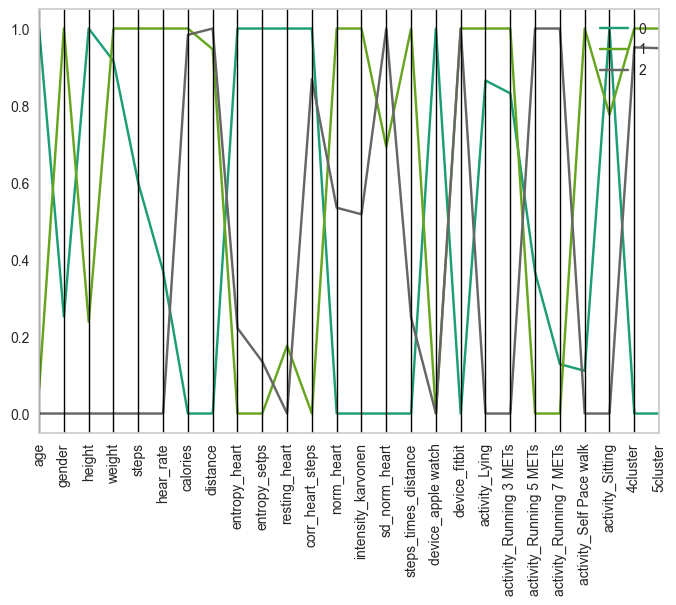

In [881]:
d_orig, d_transf = coord_plot(x_data_cl, '3cluster')

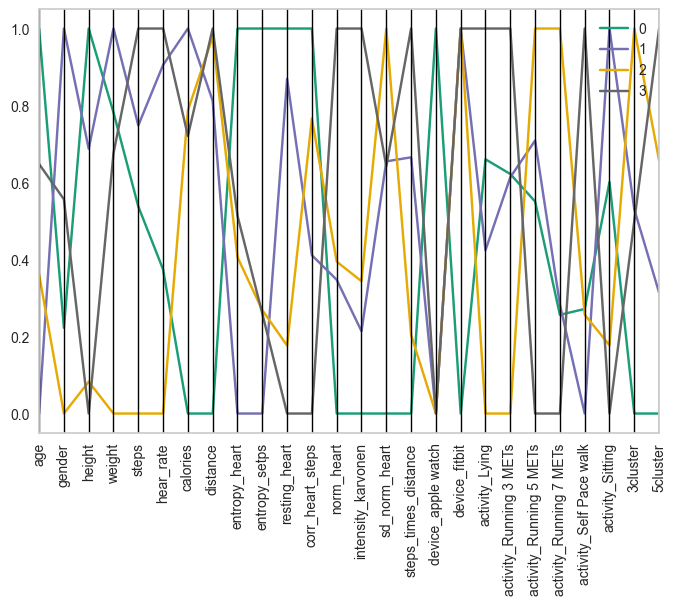

In [882]:
d_orig_4, d_transf_4 = coord_plot(x_data_cl, '4cluster')

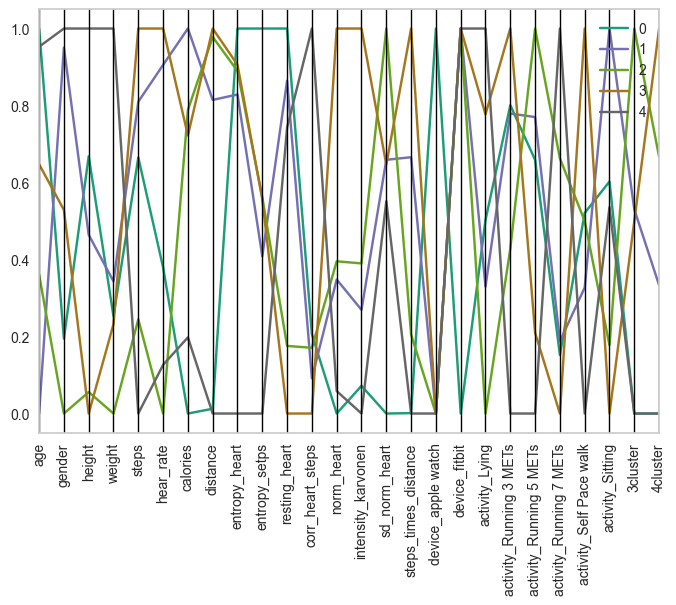

In [883]:
d_orig_5, d_transf_5 = coord_plot(x_data_cl, '5cluster')

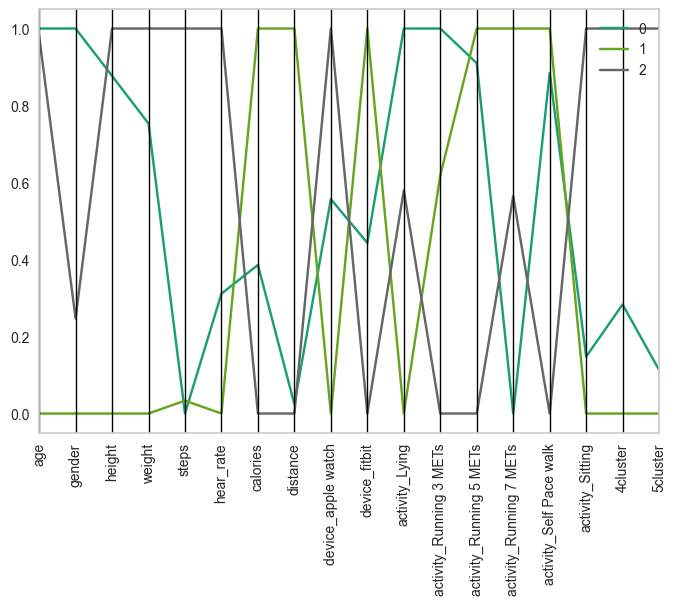

In [884]:
d_orig_obs, d_transf_obs = coord_plot(x_obs_data_cl, '3cluster')

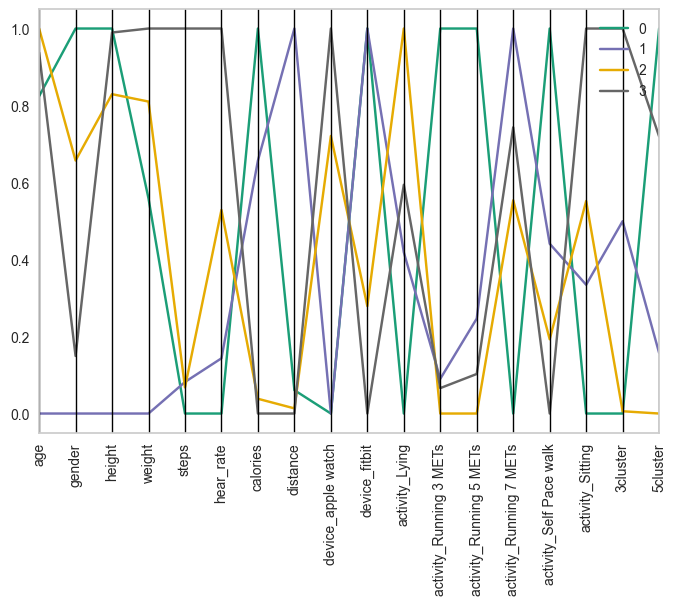

In [885]:
d_orig_obs_4, d_transf_obs_4 = coord_plot(x_obs_data_cl, '4cluster')

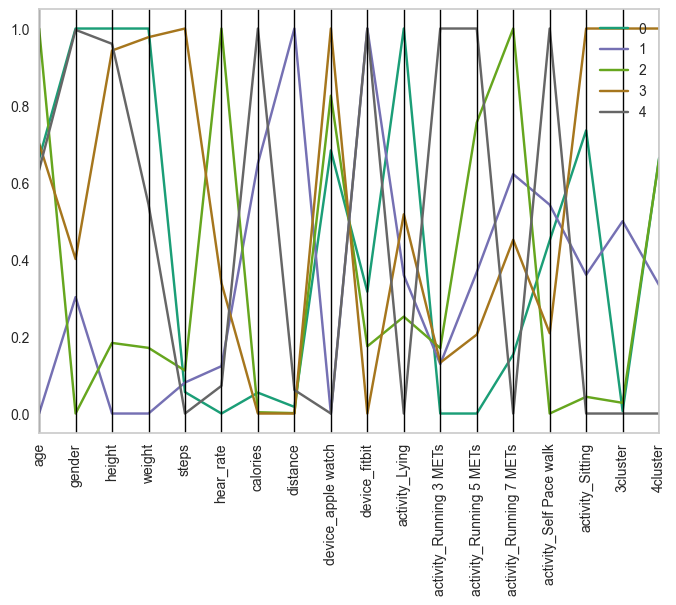

In [886]:
d_orig_obs_5, d_transf_obs_5 = coord_plot(x_obs_data_cl, '5cluster')

In [887]:
d_orig

age    gender      height     weight       steps   hear_rate  \
0  29.222150  0.475053  169.856012  69.635351  110.041885   86.085253   
1  26.000000  0.641791  164.098507  70.059701  154.223881  107.964287   
2  25.783784  0.418919  162.297297  65.035135   44.175676   73.240633   

    calories    distance  entropy_heart  entropy_setps  ...  device_fitbit  \
0  18.897923    8.505827       6.049462       5.807761  ...        0.40193   
1  44.082090  238.805970       5.563205       3.008277  ...        1.00000   
2  43.668919  251.905405       5.671035       3.385721  ...        1.00000   

   activity_Lying  activity_Running 3 METs  activity_Running 5 METs  \
0        0.221168                 0.152462                 0.159823   
1        0.238806                 0.164179                 0.119403   
2        0.108108                 0.094595                 0.229730   

   activity_Running 7 METs  activity_Self Pace walk  activity_Sitting  \
0                 0.175200                 0.141665          0.149681   
1                 0.149254                 0.194030          0.134328   
2                 0.351351                 0.135135          0.081081   

   4cluster  5cluster  3cluster  
0  0.000000  0.084410         0  
1  2.074627  2.074627         1  
2  1.972973  1.972973         2  

[3 rows x 27 columns]

In [888]:
d_transf

age    gender    height    weight     steps  hear_rate  calories  \
0  1.000000  0.251868  1.000000  0.915545  0.598521    0.36991  0.000000   
1  0.062883  1.000000  0.238296  1.000000  1.000000    1.00000  1.000000   
2  0.000000  0.000000  0.000000  0.000000  0.000000    0.00000  0.983594   

   distance  entropy_heart  entropy_setps  ...  device_fitbit  activity_Lying  \
0  0.000000       1.000000       1.000000  ...            0.0        0.865048   
1  0.946181       0.000000       0.000000  ...            1.0        1.000000   
2  1.000000       0.221756       0.134826  ...            1.0        0.000000   

   activity_Running 3 METs  activity_Running 5 METs  activity_Running 7 METs  \
0                 0.831613                 0.366369                 0.128387   
1                 1.000000                 0.000000                 0.000000   
2                 0.000000                 1.000000                 1.000000   

   activity_Self Pace walk  activity_Sitting  4cluster  5cluster  3cluster  
0                 0.110879            1.0000  0.000000  0.000000         0  
1                 1.000000            0.7762  1.000000  1.000000         1  
2                 0.000000            0.0000  0.951001  0.948923         2  

[3 rows x 27 columns]

### Silhouette

In [889]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

For k=3 all columns:

In [890]:
sil_avg = silhouette_score(x_data_norm, cl_model.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.9106974876148455


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=0))

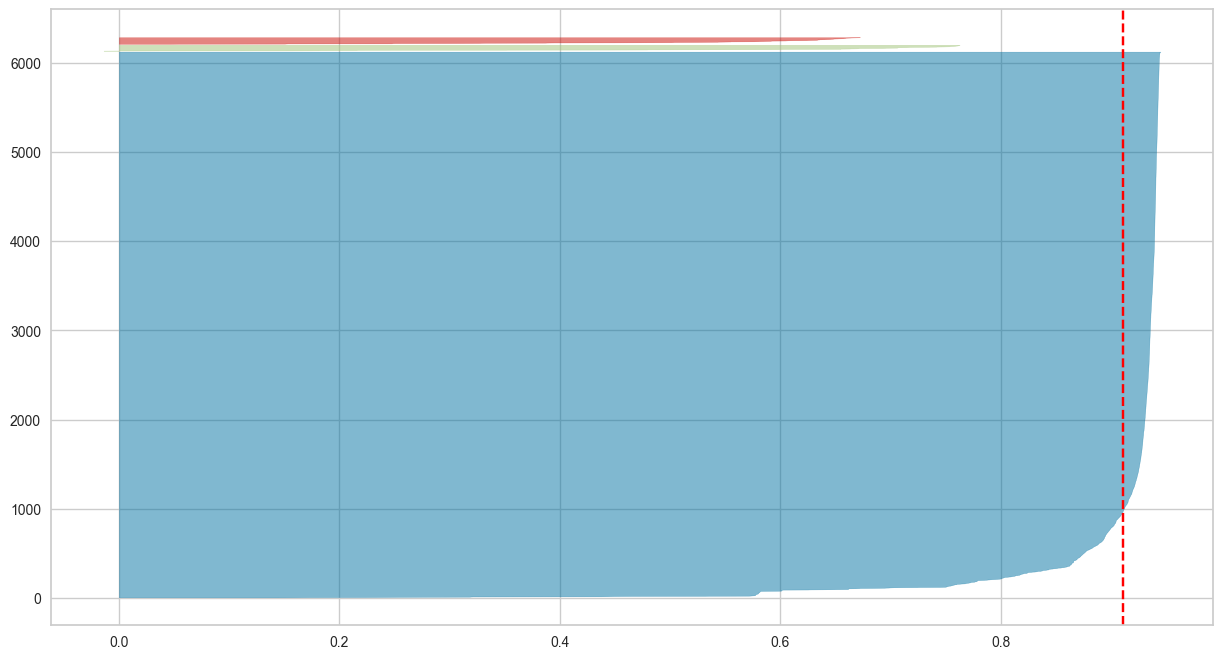

In [891]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k=3 observation columns:

In [892]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.475137549265012


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3,
                                      random_state=0))

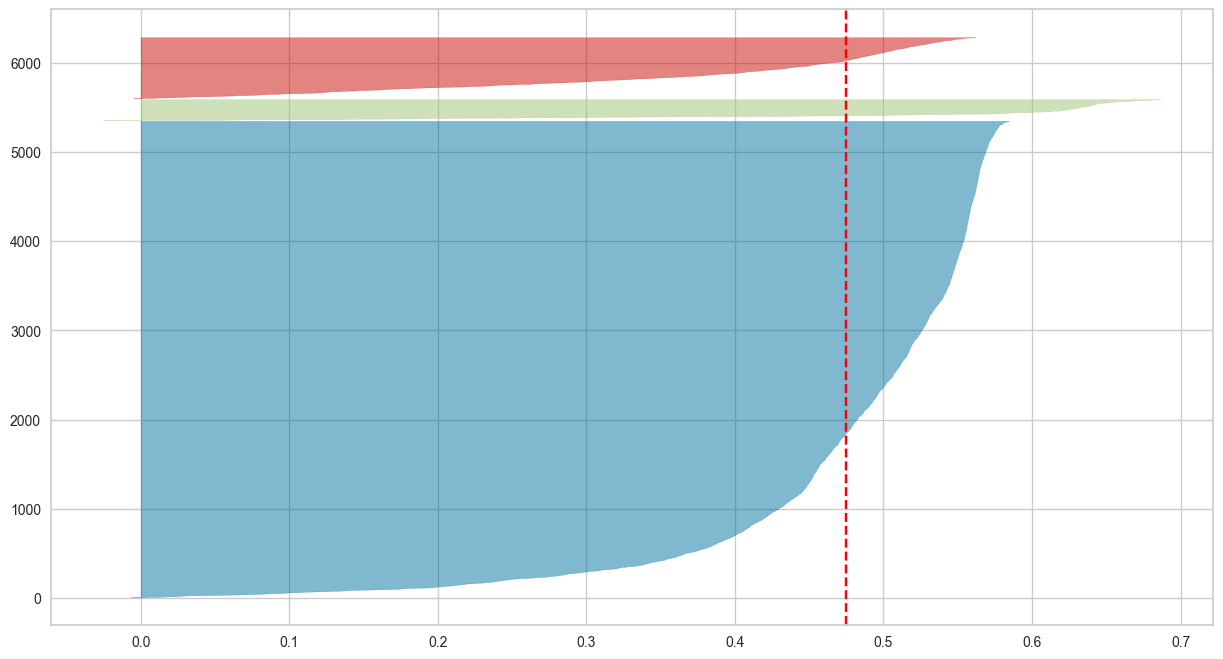

In [893]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

For k = 4 and all columns

In [894]:
sil_avg = silhouette_score(x_data_norm, cl_model_4.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.9078908145948367


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4,
                                      random_state=0))

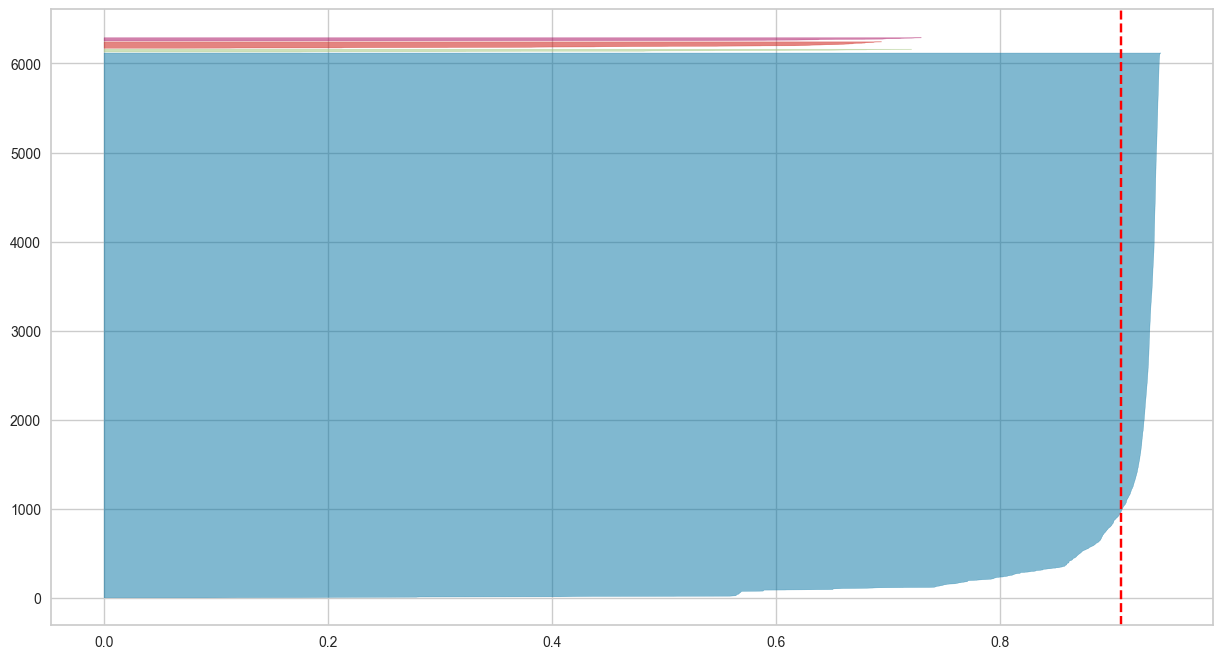

In [895]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_4, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k = 4 observable columns

In [896]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_4_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.31998785262548013


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=4,
                                      random_state=0))

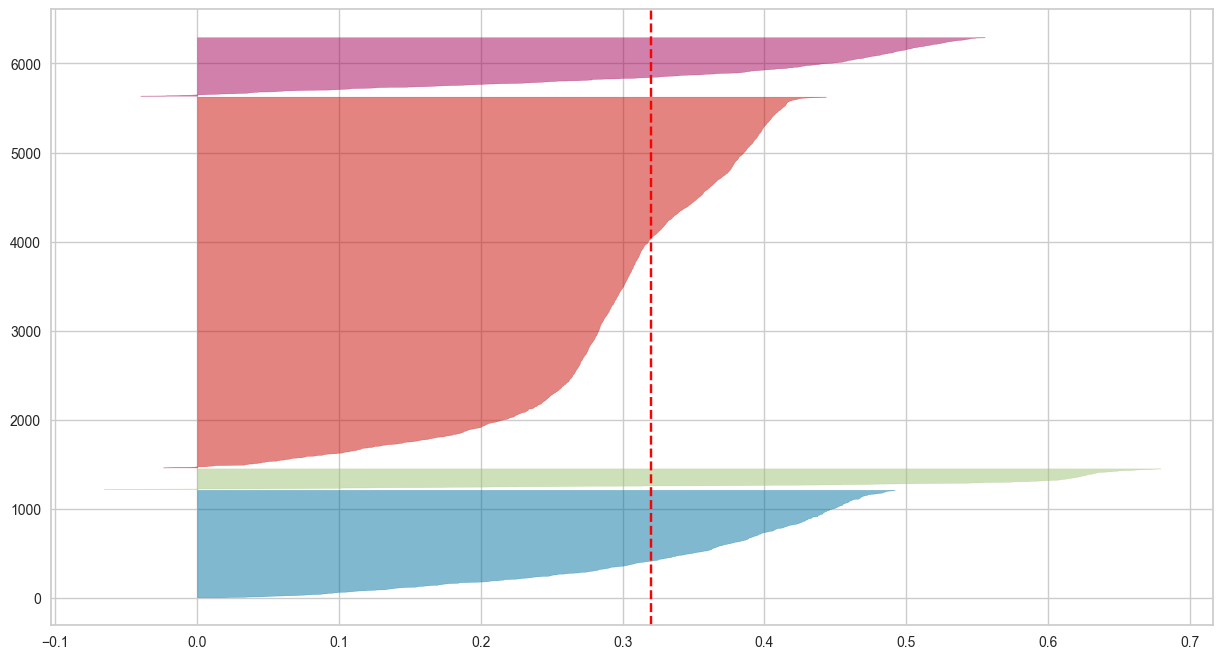

In [897]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_4_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

For k = 5 and all columns

In [898]:
sil_avg = silhouette_score(x_data_norm, cl_model_5.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.7983031239378161


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=5,
                                      random_state=0))

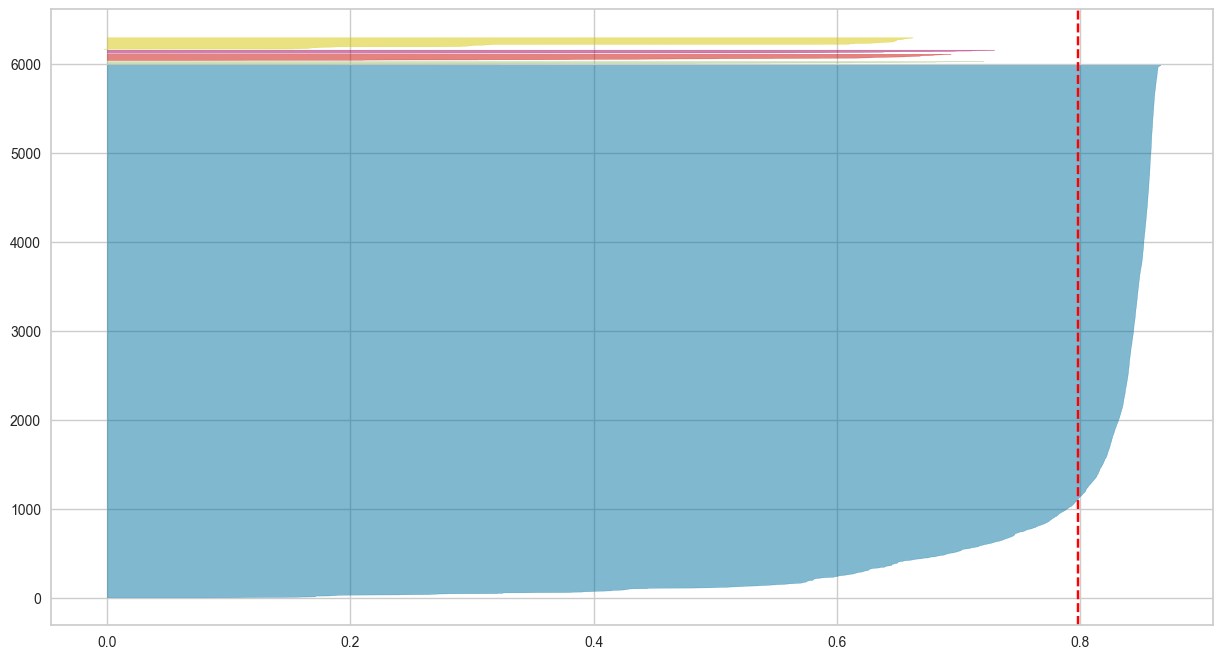

In [899]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_5, colors='yellowbrick')
visualizer.fit(x_data_norm)

For k = 5 observable columns

In [900]:
sil_avg = silhouette_score(x_obs_data_norm, cl_model_5_obs.labels_)
print(f"El Score es de {sil_avg}")

El Score es de 0.28407458685131426


SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=5,
                                      random_state=0))

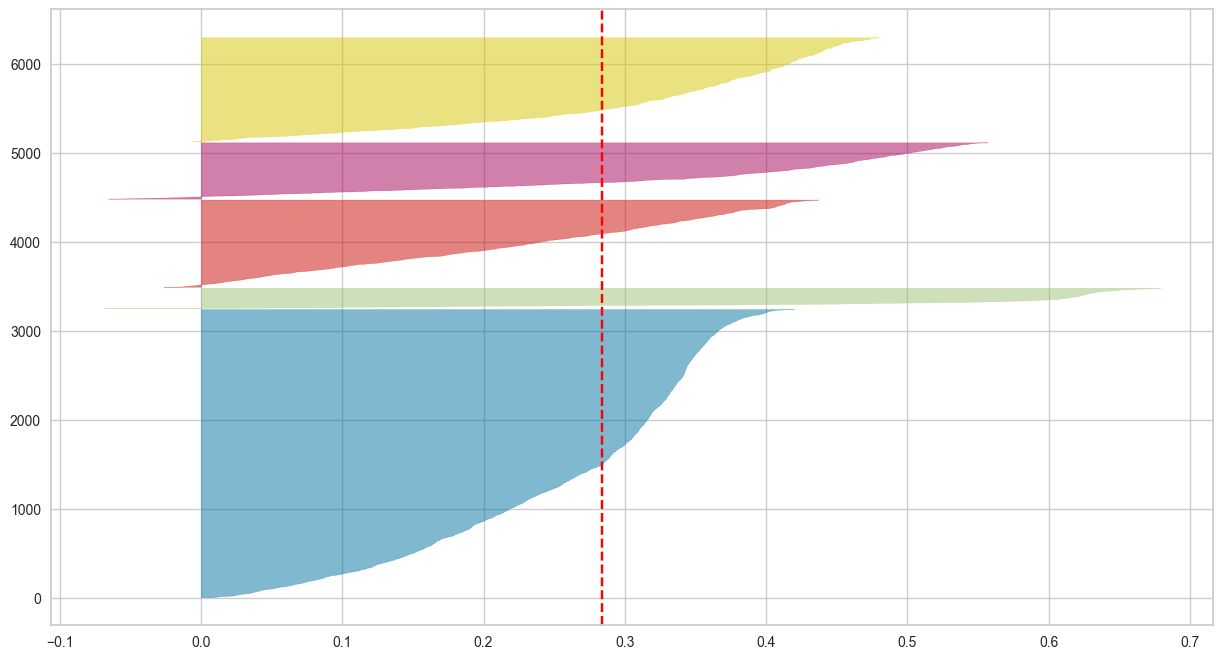

In [901]:
plt.figure(figsize=(15,8))
visualizer = SilhouetteVisualizer(cl_model_5_obs, colors='yellowbrick')
visualizer.fit(x_obs_data_norm)

Podemos concluir que KMeans no es un buen método de clusterización ya que los valores del silhouette score es bajo (0.15 o menor) para los valores 3, 4 y 5 de K. Tambien se observa que el score es algo mayor en los set de datos donde solo hay colunmas de datos observables sin columnas de datos computados, salvo para k=3 donde es levemente menor, pero sí observamos que cuando tomamos todas las columnas, hay más datos con score menor que cero en todas las gráficas sin importar el valor de k.

## Bonus: Scatter 3D!

In [902]:
status(data)

variable  q_nan  p_nan  q_zeros   p_zeros  unique     type
0                    age      0    0.0        0  0.000000      24    int64
1                 gender      0    0.0     3276  0.523825       2    int64
2                 height      0    0.0        0  0.000000      28  float64
3                 weight      0    0.0        0  0.000000      43  float64
4                  steps      0    0.0        0  0.000000    3919  float64
5              hear_rate      0    0.0        0  0.000000    4514  float64
6               calories      0    0.0        0  0.000000    2136  float64
7               distance      0    0.0        0  0.000000    4863  float64
8          entropy_heart      0    0.0       15  0.002398      56  float64
9          entropy_setps      0    0.0       83  0.013272      60  float64
10         resting_heart      0    0.0        0  0.000000      83  float64
11      corr_heart_steps      0    0.0        0  0.000000    2925  float64
12            norm_heart      0    0.0      160  0.025584    5033  float64
13    intensity_karvonen      0    0.0      160  0.025584    5841  float64
14         sd_norm_heart      0    0.0        1  0.000160    3435  float64
15  steps_times_distance      0    0.0        0  0.000000    4939  float64
16                device      0    0.0        0  0.000000       2   object
17              activity      0    0.0        0  0.000000       6   object

In [903]:
# Tomamos muestra para que no nos explote el gráfico ;)
d2=data.sample(n=300)

In [904]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d2, x='weight', y='age', z='height', color='activity')
fig.show()

In [905]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl2=data.copy() # hagan copia de los datos de TR para no perderlos antes de normalizar
x_data_cl2[cluster_var]=cl_model.predict(x_data_norm) # ojo aca! el predict es de los datos normalizados

In [906]:
d3 = x_data_cl2.sample(200)

In [907]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d3, x='gender', y='age', z='cluster', color='activity')
fig.show()

In [908]:
x_data_cl2.cluster = x_data_cl2.cluster.astype(str) 
x_data_cl2.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  resting_heart  corr_heart_steps  norm_heart  \
1       6.221612       6.116349           59.0          1.000000   19.531302   
2       6.221612       6.116349           59.0          1.000000   19.453390   
3       6.221612       6.116349           59.0          1.000000   19.540825   
4       6.221612       6.116349           59.0          1.000000   19.628260   
5       6.221612       6.116349           59.0          0.982816   19.715695   

   intensity_karvonen  sd_norm_heart  steps_times_distance       device  \
1            0.138520       1.000000              0.089692  apple watch   
2            0.137967       1.000000              0.102088  apple watch   
3            0.138587       1.000000              0.115287  apple watch   
4            0.139208       1.000000              0.129286  apple watch   
5            0.139828       0.241567              0.144088  apple watch   

  activity cluster  
1    Lying       0  
2    Lying       0  
3    Lying       0  
4    Lying       0  
5    Lying       0

In [909]:
# Tomamos muestra para que no nos explote el gráfico ;)
d4= x_data_norm_pred.sample(n=100)
d4['cluster'] = d4['3cluster'].astype('str')

In [910]:
# Usamos la maravilla de plotly
import plotly.express as px

fig = px.scatter_3d(d4, x='height', y='age', z='calories', color='cluster')
fig.show()

**Nota** 
<br>Si no aparece el gráfico -> Instalar en la consola la extension:

`jupyter labextension install jupyterlab-plotly`

Luego reiniciar jupyer lab.

---

## Resumen!

- Modelo de clustering k-means (k=3)
- Gráfico del codo (elbow)
- Creamos datos para el visualizador
- Exploramos el modelo con `coord_plot` de `funpymodeling` <3



# 5) Clustering con HDBSCAN 🤖

## 5.1) Creación del modelo

Doc oficial: https://hdbscan.readthedocs.io/en/latest/

`!pip install hdbscan`

Ojo: En sklearn esta dbscan (sin la H). Es casi igual pero con más hiperparámetros.
<br>En HDBSCAN encuentra internamente prueba distintos valores (usen este).

La librería hdbscan actualmente presenta muchos conflictos con su versionado y distintas versiones con Python.

Así que también existe esta alternativa: [fast hdbscan](https://github.com/TutteInstitute/fast_hdbscan/)

`!pip install fast_hdbscan`

In [911]:
!pip install hdbscan

Python(99557) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [912]:
import hdbscan

In [913]:
# Si utilizan la otra alternativa
# import fast_hdbscan

Generamos el modelo y fiteamos:
<br>**Condición todas las variables numéricas y sin nulos.**

In [914]:
model_hdb = hdbscan.HDBSCAN()
model_hdb.fit(filter_data)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



HDBSCAN()

In [915]:
# Nro de cluster
model_hdb.labels_

array([189, 189, 189, ...,  -1,  -1,  -1])

In [916]:
from funpymodeling.exploratory import freq_tbl, todf

freq_tbl(model_hdb.labels_.astype('str'))

0  frequency  percentage  cumulative_perc
0     -1       2630    0.420531         0.420531
1    138        121    0.019348         0.439878
2    113         73    0.011673         0.451551
3    155         72    0.011513         0.463064
4    125         68    0.010873         0.473937
..   ...        ...         ...              ...
217   24          5    0.000799         0.996802
218   98          5    0.000799         0.997602
219  142          5    0.000799         0.998401
220   19          5    0.000799         0.999201
221  111          5    0.000799              1.0

[222 rows x 4 columns]

**227 clusters**

Y uno de ellos es de ruido (indicado con el `-1`)

## 5.2) Tuning/regularización de HDBSCAN para menos clusters

Muy útil cuando tenes muchos clusters

In [917]:
# Ese 80 significa que cada cluster va a tener como mínimo 80 casos
model_hdb2 = hdbscan.HDBSCAN(min_cluster_size=80).fit(filter_data)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [918]:
freq_tbl(model_hdb2.labels_.astype('str'))

0  frequency  percentage  cumulative_perc
0  -1       3249    0.519508         0.519508
1   1       1518    0.242725         0.762232
2   0       1298    0.207547         0.969779
3   2        189    0.030221              1.0

**Notar el cluster de ruido. ¿qué cambió?**<br>
Primero el ruido era de 42% y aumentó a 53%, esto es una proporción muy alta para una clusterización

## 5.3) Análisis del modelo cluster (profiling)

In [919]:
cluster_var='cluster' # definan nombre de var de clustering
x_data_cl=filter_data.copy() # hagan copia de los datos de TR para no perderlos
x_data_cl[cluster_var]=model_hdb2.labels_ # ojo aca! el predict es de los datos normalizados

In [920]:
x_data_cl.head()

age  gender  height  weight      steps  hear_rate   calories  distance  \
1   20       1   168.0    65.4  10.771429  78.531302   0.344533  0.008327   
2   20       1   168.0    65.4  11.475325  78.453390   3.287625  0.008896   
3   20       1   168.0    65.4  12.179221  78.540825   9.484000  0.009466   
4   20       1   168.0    65.4  12.883117  78.628260  10.154556  0.010035   
5   20       1   168.0    65.4  13.587013  78.715695  10.825111  0.010605   

   entropy_heart  entropy_setps  ...  steps_times_distance  \
1       6.221612       6.116349  ...              0.089692   
2       6.221612       6.116349  ...              0.102088   
3       6.221612       6.116349  ...              0.115287   
4       6.221612       6.116349  ...              0.129286   
5       6.221612       6.116349  ...              0.144088   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
1                True          False            True                    False   
2                True          False            True                    False   
3                True          False            True                    False   
4                True          False            True                    False   
5                True          False            True                    False   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
1                    False                    False                    False   
2                    False                    False                    False   
3                    False                    False                    False   
4                    False                    False                    False   
5                    False                    False                    False   

   activity_Sitting  cluster  
1             False        1  
2             False        1  
3             False        1  
4             False        1  
5             False        1  

[5 rows x 25 columns]

Saquemos el cluster de ruido:

In [921]:
x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

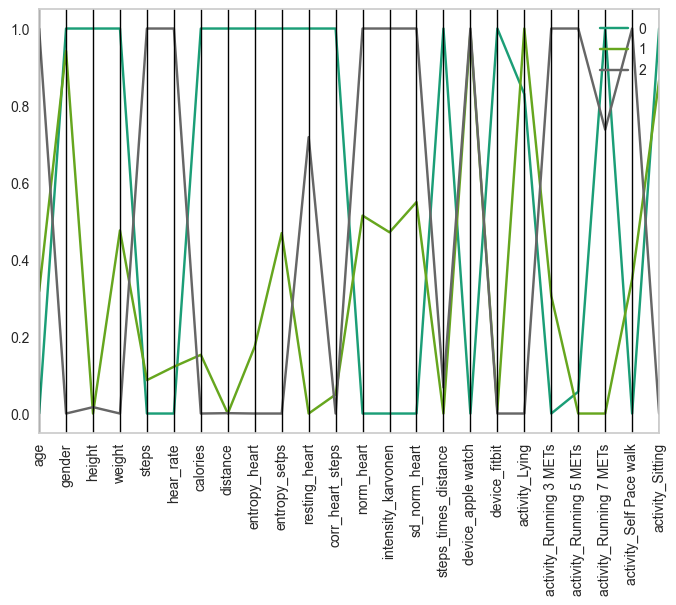

In [922]:
from funpymodeling.model_validation import coord_plot
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

In [923]:
d_orig

age    gender      height     weight       steps  hear_rate  \
0  27.280431  0.541602  172.828891  71.088906    6.124578  76.914203   
1  28.485507  0.527668  169.540711  69.795784   15.281326  79.607308   
2  31.079365  0.301587  169.595238  68.622751  111.674612  99.069432   

    calories   distance  entropy_heart  entropy_setps  ...  \
0  38.332820  15.656453       6.258226       6.258226  ...   
1   8.669849   0.047246       6.165192       6.108162  ...   
2   3.331040   0.061975       6.145568       5.975775  ...   

   steps_times_distance  device_apple watch  device_fitbit  activity_Lying  \
0             95.579471            0.000000       1.000000        0.218028   
1              0.452559            0.990119       0.009881        0.256258   
2              6.900165            1.000000       0.000000        0.031746   

   activity_Running 3 METs  activity_Running 5 METs  activity_Running 7 METs  \
0                 0.159476                 0.164099                 0.137904   
1                 0.199605                 0.156785                 0.055995   
2                 0.291005                 0.285714                 0.116402   

   activity_Self Pace walk  activity_Sitting  cluster  
0                 0.158706          0.161787        0  
1                 0.186430          0.144928        1  
2                 0.238095          0.037037        2  

[3 rows x 25 columns]

In [924]:
d_transf

age    gender    height    weight     steps  hear_rate  calories  \
0  0.000000  1.000000  1.000000  1.000000  0.000000   0.000000   1.00000   
1  0.317214  0.941943  0.000000  0.475652  0.086753   0.121556   0.15253   
2  1.000000  0.000000  0.016583  0.000000  1.000000   1.000000   0.00000   

   distance  entropy_heart  entropy_setps  ...  steps_times_distance  \
0  1.000000        1.00000       1.000000  ...              1.000000   
1  0.000000        0.17419       0.468709  ...              0.000000   
2  0.000944        0.00000       0.000000  ...              0.067779   

   device_apple watch  device_fitbit  activity_Lying  activity_Running 3 METs  \
0            0.000000       1.000000        0.829717                 0.000000   
1            0.990119       0.009881        1.000000                 0.305093   
2            1.000000       0.000000        0.000000                 1.000000   

   activity_Running 5 METs  activity_Running 7 METs  activity_Self Pace walk  \
0                 0.056724                 1.000000                 0.000000   
1                 0.000000                 0.000000                 0.349212   
2                 1.000000                 0.737487                 1.000000   

   activity_Sitting  cluster  
0          1.000000        0  
1          0.864851        1  
2          0.000000        2  

[3 rows x 25 columns]

In [925]:
freq_tbl(x_data_cl['cluster'])

'No categorical variables to analyze.'

## 5.4) _Sanity check!_

In [926]:
data_check=data.copy()
data_check['cluster']=model_hdb2.labels_
#data_check=data_check[['cluster', 'track_name']]

In [927]:
data_check.tail(3)


age  gender  height  weight  steps  hear_rate  calories  distance  \
6259   46       0   157.5    71.4    1.0       35.0       1.0       1.0   
6260   46       0   157.5    71.4    1.0       35.0      20.5       1.0   
6261   46       0   157.5    71.4    1.0       35.0      20.5       1.0   

      entropy_heart  entropy_setps  resting_heart  corr_heart_steps  \
6259            0.0            0.0           35.0               1.0   
6260            0.0            0.0           35.0               1.0   
6261            0.0            0.0           35.0               1.0   

      norm_heart  intensity_karvonen  sd_norm_heart  steps_times_distance  \
6259         0.0                 0.0      25.072344                   1.0   
6260         0.0                 0.0       0.000000                   1.0   
6261         0.0                 0.0       1.000000                   1.0   

      device        activity  cluster  
6259  fitbit           Lying       -1  
6260  fitbit  Running 7 METs       -1  
6261  fitbit  Running 7 METs       -1

## 5.5) Calculo de Silhouette

#### Repasando Silhouette:
    
Rango: [-1,+1]

+1: el punto esta muy cerca de su centroide

0: el punto esta en el medio de 2 clusters

-1: el punto asignado al cluster i esta más cerca del centroide del cluster j

### Calculandolo especialmente para HDBSCAN

In [928]:
from sklearn.metrics import silhouette_score, silhouette_samples

sil_avg = silhouette_score(filter_data, model_hdb2.labels_)

`silhouette_score`: nos da el promedio global

In [929]:
sil_avg

-0.1913411348844168

`silhouette_samples` nos da el valor silhouette para cada registro:

In [930]:
sample_silhouette_values = silhouette_samples(filter_data, model_hdb2.labels_)

In [931]:
sample_silhouette_values

array([ 0.67829359,  0.6831034 ,  0.68720939, ..., -0.94424991,
       -0.94615032, -0.94618883])

In [932]:
res_sil=pd.DataFrame({'sil_value': sample_silhouette_values, 'cluster': model_hdb2.labels_})
res_sil

sil_value  cluster
0      0.678294        1
1      0.683103        1
2      0.687209        1
3      0.685651        1
4      0.683234        1
...         ...      ...
6249  -0.932457       -1
6250  -0.937391       -1
6251  -0.944250       -1
6252  -0.946150       -1
6253  -0.946189       -1

[6254 rows x 2 columns]

In [933]:
import matplotlib.cm as cm

A continuación se puede jugar con el valor ```min_cluster_size=150``` para obtener un mejor gráfico y un mejor score global. 

Probé con ```min_cluster_size=80``` como propone la consigna pero el resultado es muy malo

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



For n_clusters = 3 The average silhouette_score is : -0.4586159885393482


/var/folders/0m/74b0vn150zdbflk7dmsw0t140000gp/T/ipykernel_36134/1068733887.py:43: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



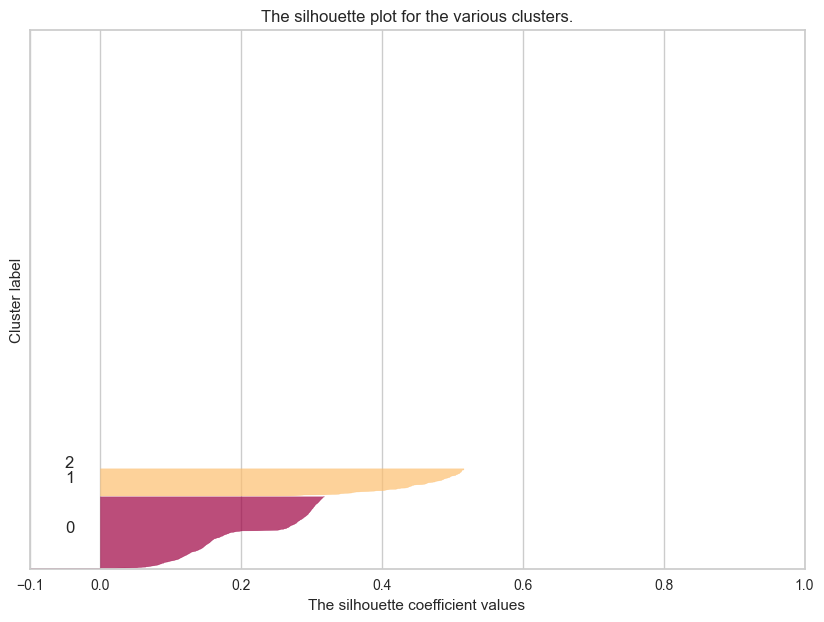

In [934]:
#Tomado de la documentación de Scitkit-learn y adaptado para DBSCAN, sacando lo de kmeans
# https://scikit-learn.sourceforge.net/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py

X = x_data_norm

# Create a subplot with 1 row and 2 columns
fig, ax = plt.subplots(figsize=(10,7))
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.

clusterer = hdbscan.HDBSCAN(min_cluster_size=150)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)
# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    cmap = cm.get_cmap("Spectral")
    color = cmap(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples
ax.set_title("The silhouette plot for the various clusters.")
ax.set_xlabel("The silhouette coefficient values")
ax.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])  # Clear the yaxis labels / ticks
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Nuevo gráfico para observar la distribución

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



AttributeError: 'QuadContourSet' object has no attribute 'collections'

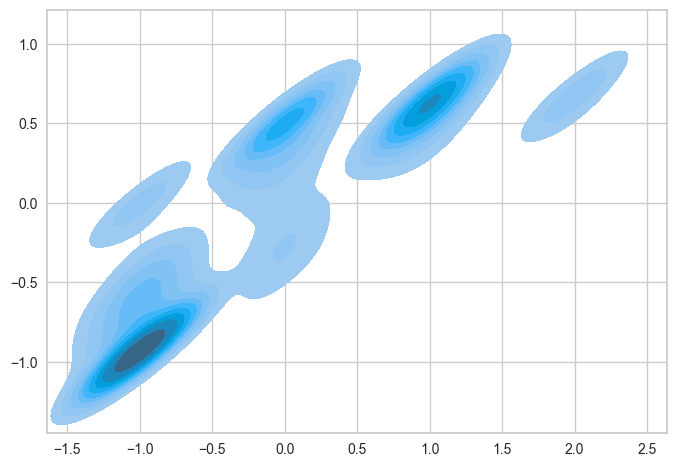

In [935]:
sns.kdeplot(data=res_sil, x='cluster', y='sil_value', fill=True)

<Axes: xlabel='cluster', ylabel='sil_value'>

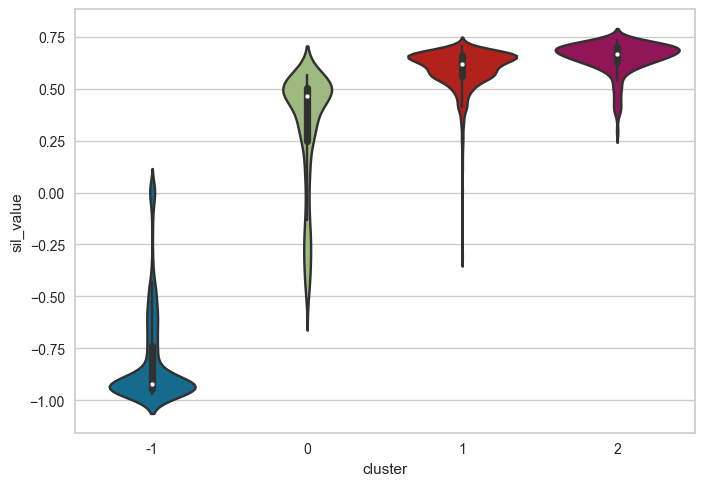

In [936]:
sns.violinplot(data=res_sil, x='cluster', y='sil_value', fill=True)

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/cosmos/Adri/Developer/DataScience/Clases + Consignas/Repo compartido Equipo 3/bootcamp-ds-mlops/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='cluster', ylabel='sil_value'>

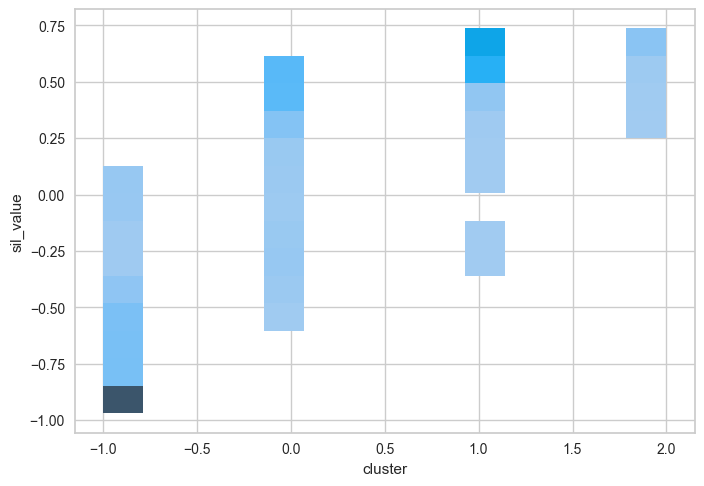

In [937]:
sns.histplot(data=res_sil, x='cluster', y='sil_value', fill=True)

Promedio de Silhouette por cluster:

In [938]:
res_sil.groupby('cluster').mean('sil_value')

sil_value
cluster           
-1       -0.806801
 0        0.308456
 1        0.593842
 2        0.649847